In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

2024-11-26 12:40:39.687542: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 12:40:39.687592: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 12:40:39.687638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 12:40:39.699489: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Parameters
data_dir = '/home/sivaranjin/lost+found/Speech/Urban Scene/Database'  # Replace with your data directory
batch_size = 16
img_height, img_width = 224, 224
num_classes = 4

In [3]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# Load the data from directory
val_generator = val_datagen.flow_from_directory(
    f'{data_dir}/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3288 images belonging to 4 classes.


In [5]:
import tensorflow as tf

class LayerScale(tf.keras.layers.Layer):
    def __init__(self, init_values=1e-6, projection_dim=None, **kwargs):
        super().__init__(**kwargs)
        self.init_values = init_values
        self.projection_dim = projection_dim  # Store projection_dim, even if unused

    def build(self, input_shape):
        self.scale = self.add_weight(
            shape=(input_shape[-1],),
            initializer=tf.keras.initializers.Constant(self.init_values),
            trainable=True,
        )

    def call(self, inputs):
        return inputs * self.scale


In [6]:
# class CustomScaleLayer(tf.keras.layers.Layer):
#     def __init__(self, scale=1.0, **kwargs):
#         super().__init__(**kwargs)
#         self.scale = scale

#     def build(self, input_shape):
#         # Extract the channel dimension
#         channels = input_shape[-1]
        
#         # If channels is not an integer, resolve it dynamically
#         if isinstance(channels, tf.TensorShape):
#             channels = channels.as_list()[-1]
        
#         if not isinstance(channels, int):
#             raise ValueError(f"Cannot resolve channel dimension from input_shape: {input_shape}")
        
#         # Add a trainable weight for the scale
#         self.trainable_scale = self.add_weight(
#             shape=(channels,),
#             initializer=tf.keras.initializers.Constant(self.scale),
#             trainable=True,
#         )

#     def call(self, inputs):
#         return inputs * self.trainable_scale


In [7]:
# model = tf.keras.models.load_model(
#     "/home/sivaranjin/lost+found/Speech/Urban Scene/InceptionResNetV2_initial.h5",
#     custom_objects={
#         'LayerScale': LayerScale,
#         'CustomScaleLayer': CustomScaleLayer
#     }
# )


In [56]:
model = tf.keras.models.load_model(
    "/home/sivaranjin/lost+found/Speech/Urban Scene/Models/EfficientNetB7_initial.h5",
    custom_objects={'LayerScale': LayerScale}
)

In [ ]:
# IMPORTANT
# run this cell minimum 2 times to get approximate correct-timing results.

t = TicToc()
t.tic()
y_pred = np.argmax(model.predict(val_generator), axis=1)
t.toc('\nThis testing took')
total_time = t.tocvalue('This testing took')
total_seg = y_pred.shape[0]

print("Average testing time is {} milliseconds\n".format(total_time*1000/total_seg))

In [ ]:
# # Load the model
# # import tensorflow as tf
# # from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# model = tf.keras.models.load_model("/home/sivaranjin/lost+found/Speech/Urban Scene/custom_model6.h5")
# model.summary()

206/206 [==============================] - 21s 99ms/step


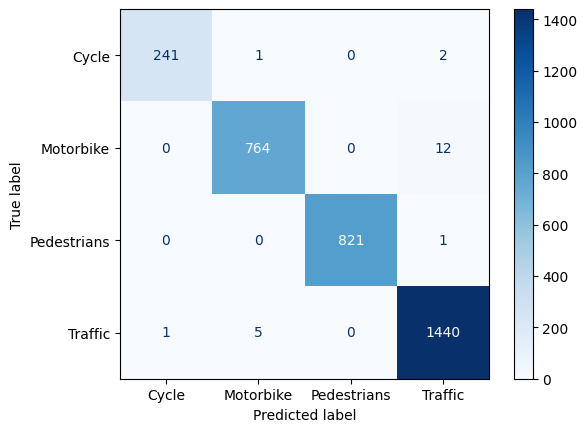

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
disp.plot(cmap='Blues')
plt.show()

In [29]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")
# print(f"Validation Precision: {precision:.2f}")
# print(f"Validation Recall: {recall:.2f}")

206/206 [==============================] - 19s 87ms/step - loss: 0.0184 - accuracy: 0.9954
Validation Accuracy: 99.54%


In [10]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from pytictoc import TicToc

In [21]:
# IMPORTANT
# run this cell minimum 2 times to get approximate correct-timing results.

t = TicToc()
t.tic()
y_pred = np.argmax(model.predict(val_generator), axis=1)
t.toc('\nThis testing took')
total_time = t.tocvalue('This testing took')
total_seg = y_pred.shape[0]

print("Average testing time is {} milliseconds\n".format(total_time*1000/total_seg))

206/206 [==============================] - 21s 89ms/step

This testing took 20.924045 seconds.
Average testing time is 6.3637968128968545 milliseconds

